## Introduction

In this task I'm going to analyze digitized customer profiles and come up with a customer retention strategy.

Tasks to do:

1.Learn to predict the probability of churn (for the upcoming month) for each customer

2.Draw up typical user portraits: select the most outstanding groups and describe their main features

3.Analyze the factors that impact churn most

4.Draw basic conclusions and develop recommendations on how to improve customer service:

       Identify target groups
       
       Suggest measures to cut churn
       
5.Describe any other patterns you see with respect to interaction with customers and so on using training algorithms and various visualizatons. Let's dive in!

## Table of Contents

<ul class="toc-item"><li><span class="highlight_on_scroll"><i class="fa fa-fw"></i><a href="#Download-the-data" data-toc-modified-id="Download-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download the data</a></span></li><li><span class=""><i class="fa fa-fw"></i><a href="#Carrying-out-exploratory-data-analysis-(EDA)" data-toc-modified-id="Carrying-out-exploratory-data-analysis-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carrying out exploratory data analysis (EDA)</a></span></li><li><span class=""><i class="fa fa-fw"></i><a href="#Building-a-model-to-predict-user-churn" data-toc-modified-id="Building-a-model-to-predict-user-churn-3" class="toc-item-highlight-select"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a model to predict user churn</a></span></li><li><span class=""><i class="fa fa-fw"></i><a href="#Creating-user-clusters" data-toc-modified-id="Creating-user-clusters-4" class=""><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating user clusters</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Coming-up-with-conclusions-and-basic-recommendations-on-working-with-customers" data-toc-modified-id="Coming-up-with-conclusions-and-basic-recommendations-on-working-with-customers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Coming up with conclusions and basic recommendations on working with customers</a></span></li></ul>

## Download the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram



/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# creating a new dataframe from the csv file
data = pd.read_csv('/datasets/gym_churn_us.csv')
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
# getting the general information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Data overview

Here we are given a dataset of customer profiles of a gym which consists of total 4000 entries. 

14 different features are listed as columns in the dataframe out of which 7 columns namely, 'gender','near_location','partner','promo_friends','phone','contract_period','group_visits','churn' have boolean values of 0 & 1 where 1 - yes or exists and 0 - no or doesn't exist for all these columns except for the gender column which is exactly opposite of this.

Where as the remaining 7 columns have numeric values representing different features and all of these columns have appropriate datatypes.

## Carrying out exploratory data analysis (EDA)

In [4]:
# checking the dataframe for the missing values
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

The data here is pretty much clean without any troublesome missing values

In [5]:
# getting the statistical information of the data
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


When we look at the mean values of boolean columns 0.26 to 0.9,standard deviation of 0.39 to 0.5 which may represent their corresponding distribution of customers like if value is 0.5 then that particular feature has almost equal 0's and 1's. 

On an average people have a contract period of about 4 n half months which may be because most of customers want to start off by taking 1 month plan then move on to 3month plan if they liked it and so on.! Also seems like mostly people between 25 to 35 years are more likely to join the gym on a regular basis.

In [6]:
# converting the column names to lower case
data.columns = data.columns.str.lower()

In [7]:
# creating a for loop to know the unique values and it's count
for i in data.columns:
    x = data[i].value_counts()
    print("\nColumn:",i," \nunique value and it's count:\n", x)


Column: gender  
unique value and it's count:
 1    2041
0    1959
Name: gender, dtype: int64

Column: near_location  
unique value and it's count:
 1    3381
0     619
Name: near_location, dtype: int64

Column: partner  
unique value and it's count:
 0    2053
1    1947
Name: partner, dtype: int64

Column: promo_friends  
unique value and it's count:
 0    2766
1    1234
Name: promo_friends, dtype: int64

Column: phone  
unique value and it's count:
 1    3614
0     386
Name: phone, dtype: int64

Column: contract_period  
unique value and it's count:
 1     2207
12     960
6      833
Name: contract_period, dtype: int64

Column: group_visits  
unique value and it's count:
 0    2351
1    1649
Name: group_visits, dtype: int64

Column: age  
unique value and it's count:
 29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2

Both Men and Women are almost equally likely to join the gym, most people prefer gyms that are in their neighborhood in order to avoid blaming long distance as an excuse of going to the gym :P, promos seem to play very small role , almost all the customers would like give their contact number , majority of them opt for 1month contract to see if they like the gym and fitness experience and most of them are staying.. yay!

In [8]:
# creating a new dataset for churn==1
data_churned = data.query('churn == 1')
data_churned.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


In [9]:
# creating a new dataset for churn==0
data_not_churned = data.query('churn == 0')
data_not_churned.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [10]:
# getting statistical information on the churned users data

data_churned.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [11]:
# getting statistical information on the non-churned users data
data_not_churned.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


From the above tables representing customers who stayed and left the gym it's evident that there isn't any remarkable difference between their average values except for the contract_period, avg_additional_charges_total. These feature values are higher for the customers who are staying which makes sense because people staying long definitely do need all the additional gym servies.

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


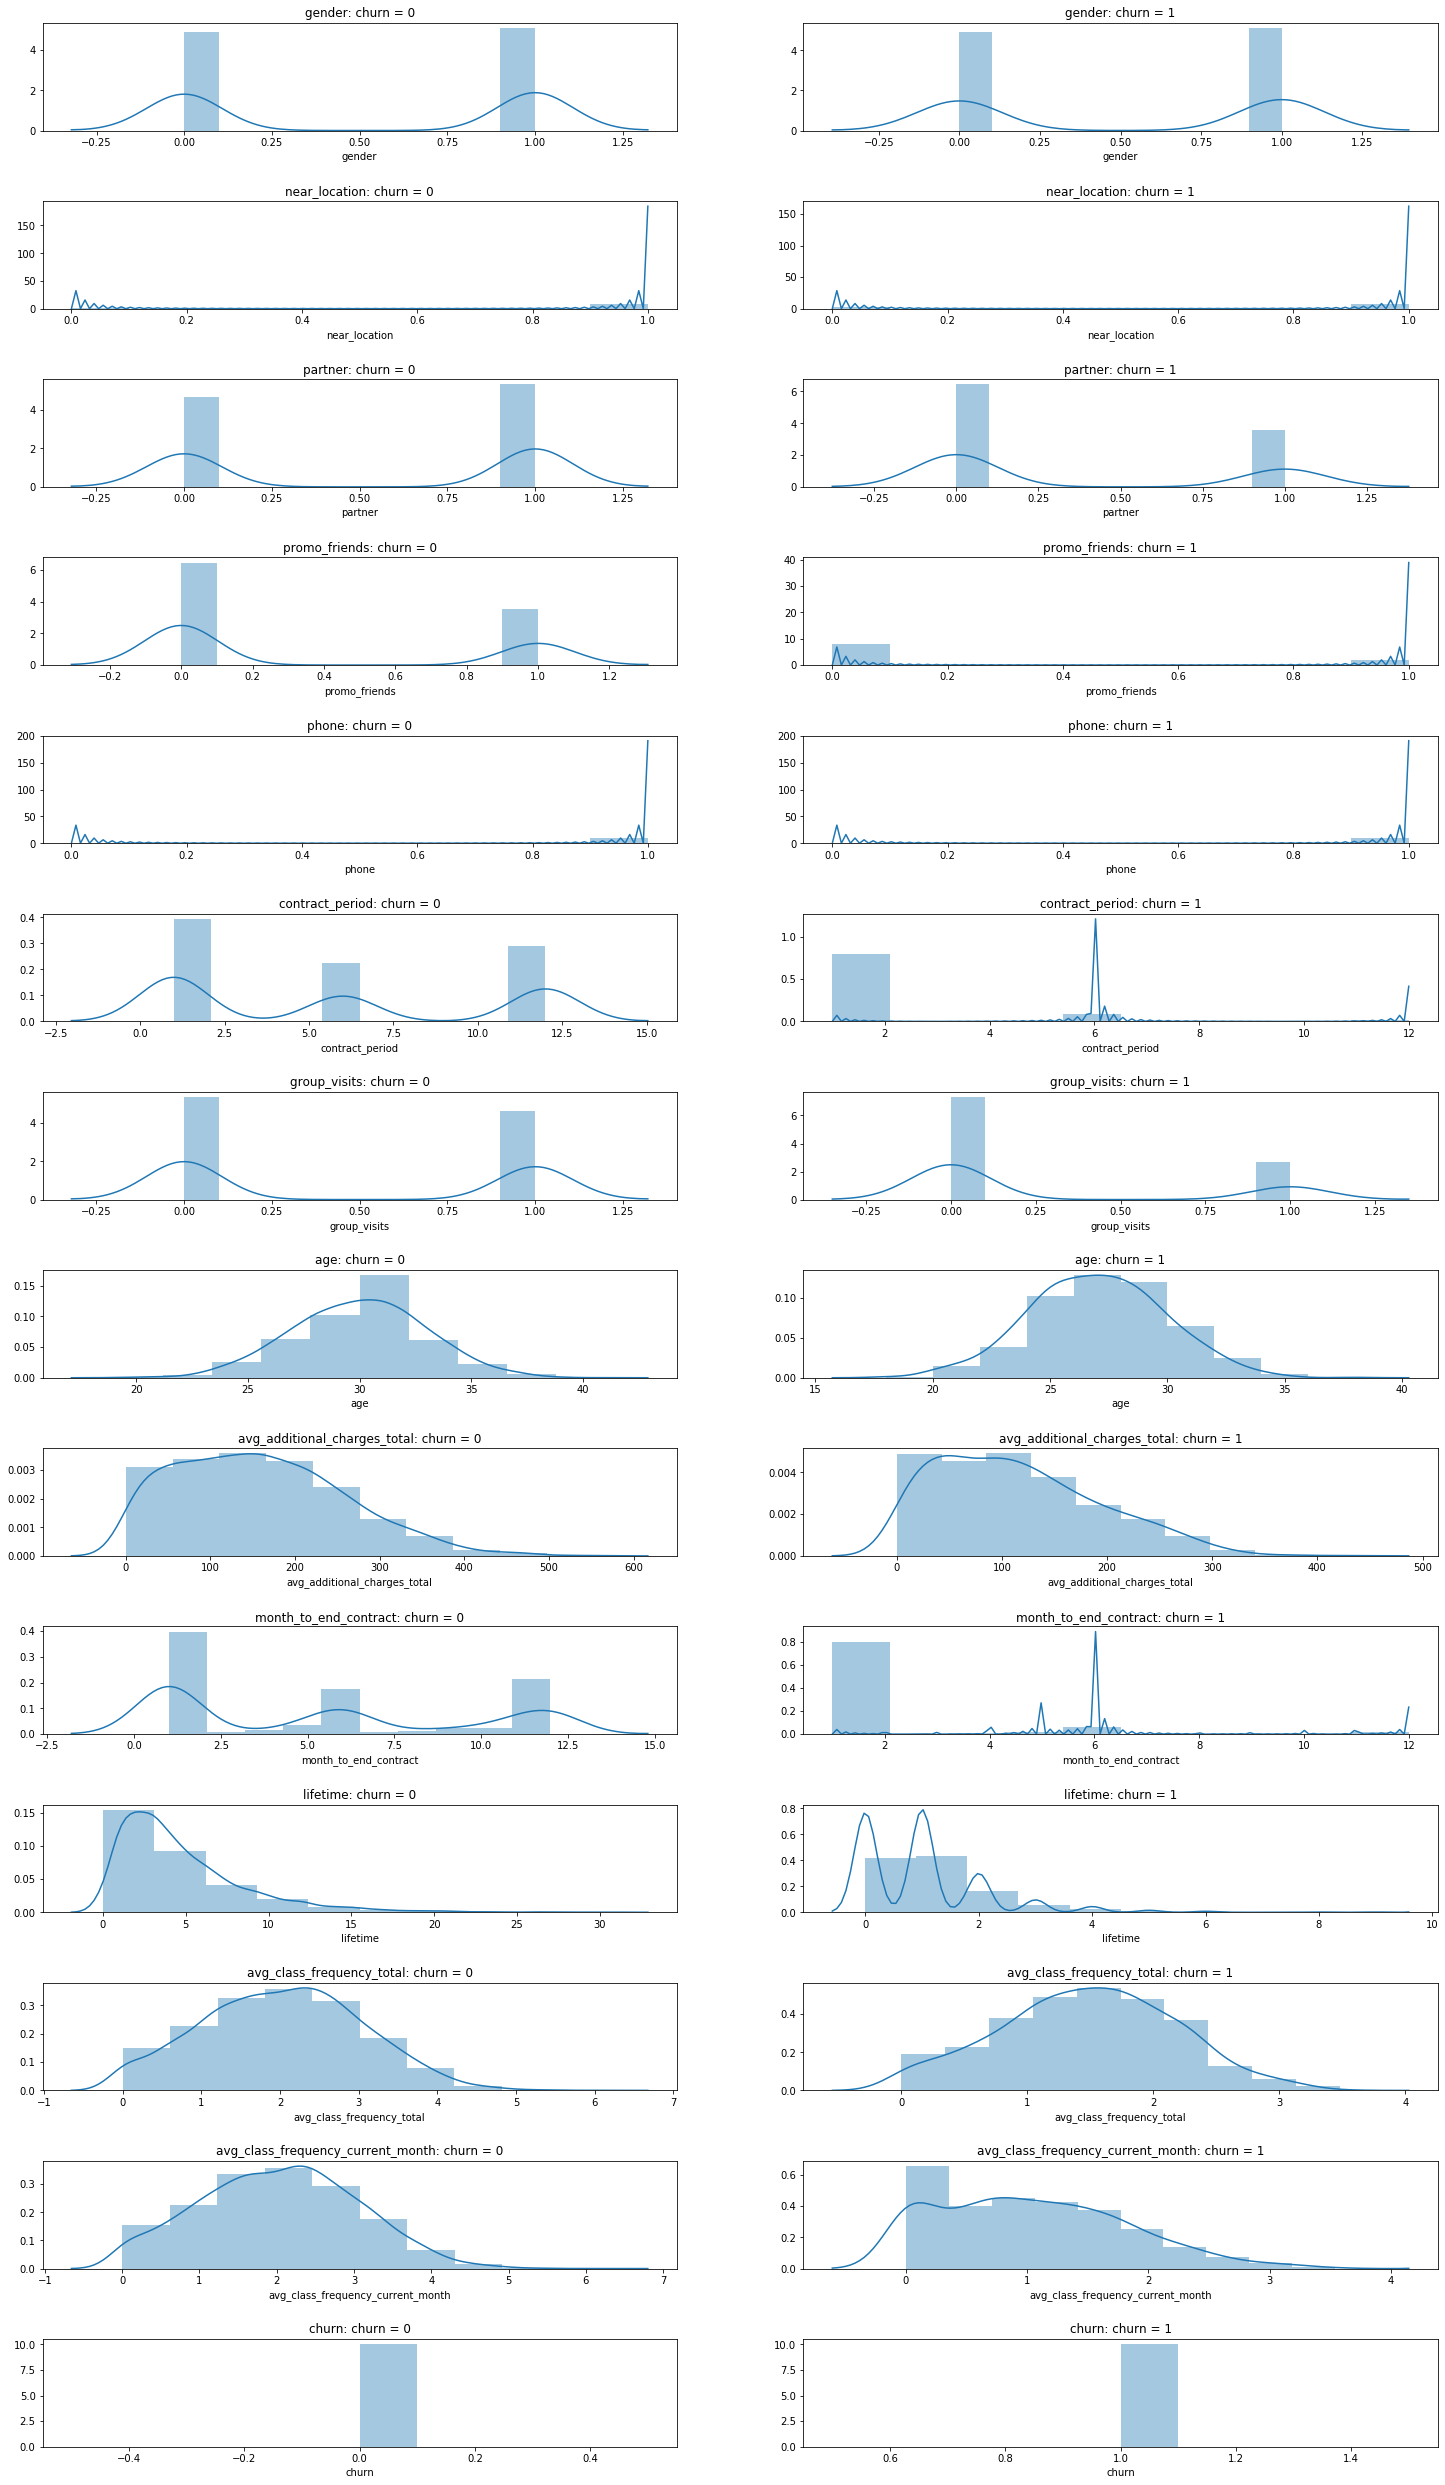

In [12]:
# plotting different graphs for all the features for churned and non churned data
i=0
plt.figure(figsize=(25, 45))
for feature in data.columns:
    ax = plt.subplot2grid((110, 13), (8*i, 0), colspan=6, rowspan=5)
    sns.distplot(data.query('churn==0')[feature], bins = 10, ax=ax)
    plt.title(feature + ': churn = 0')
    ax = plt.subplot2grid((110, 13), (8*i, 7), colspan=6, rowspan=5)
    sns.distplot(data.query('churn==1')[feature], bins = 10, ax=ax)
    plt.title(feature + ': churn = 1')
    i += 1
plt.show();

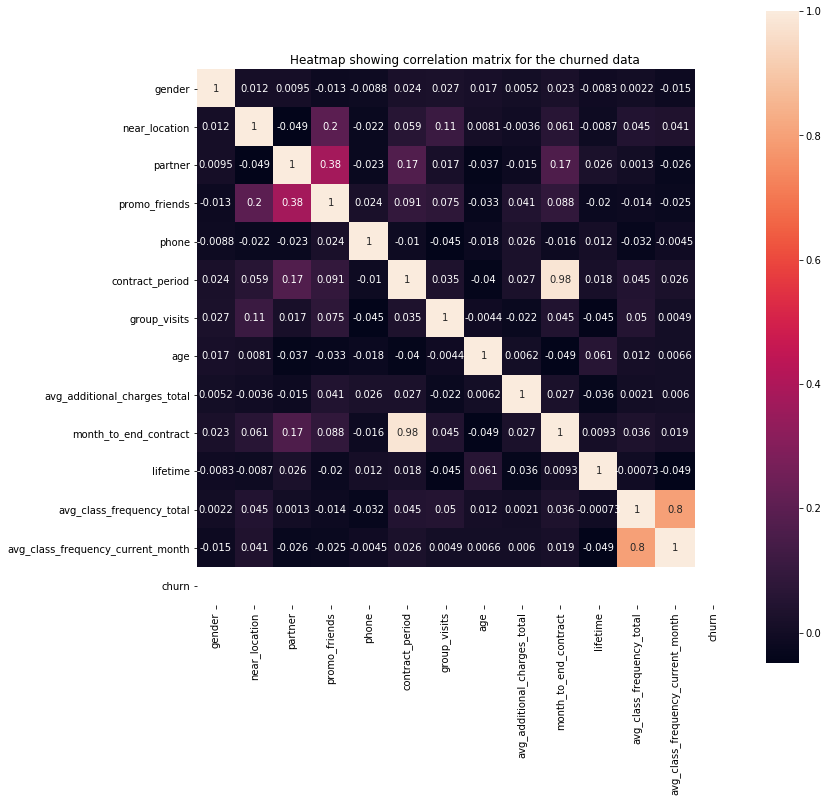

In [13]:
# getting a correlation matrix for the churned data and plotting a heatmap
corr_m = data_churned.corr()  
plt.figure(figsize=(12,12))
sns.heatmap(corr_m,square=True,annot=True)
plt.title('Heatmap showing correlation matrix for the churned data');



The correlation matrix of people who are likely to continue clearly shows that people having partnership and joined through promos codes offered , avg_class_frequeny_current_month and avg_class_frequeny_total, month_to_end and contract period are highly correlated with the values o.38, 0.8, 0.9 respectively.

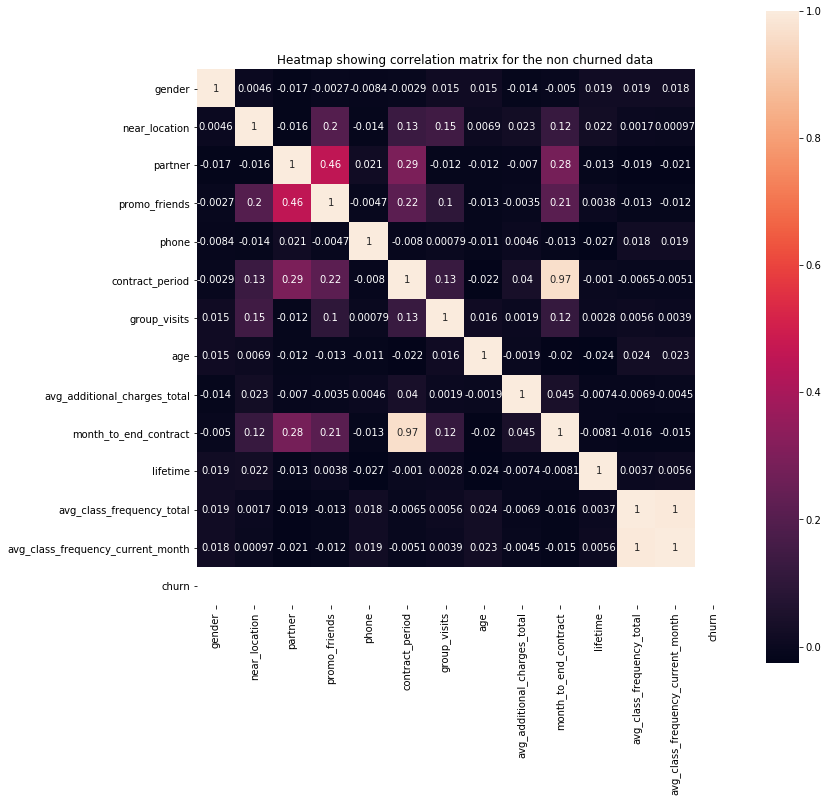

In [14]:
# getting a correlation matrix for the churned data and plotting a heatmap
corr_m = data_not_churned.corr()  
plt.figure(figsize=(12,12))
sns.heatmap(corr_m,square=True,annot=True)
plt.title('Heatmap showing correlation matrix for the non churned data');


The correlation matrix of people who are likely to discontinue clearly shows that there isn't much of significant difference between the features of churned_data and non_churned data except for the higher values of correlation between the postively correlated features.

## Building a model to predict user churn

In [15]:
# dividing the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis = 1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [16]:
# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


In [17]:
# defining the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [18]:
# defining the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# training the model
lr_model.fit(X_train_st, y_train)
# using the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# printing all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')


Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# defining the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) # write your code here
# training the random forest model
rf_model.fit(X_train, y_train)
# using the trained model to make predictions
rf_predictions =rf_model.predict(X_test)# write your code here
rf_probabilities = rf_model.predict_proba(X_test)[:,1]# write your code here
# printing all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


As we need to make a decision of yes or no which comes under binary classification I decided to proceed wih RandomForestClassifier algorithm. When we compare the results of both models i.e, LogisticRegression and RandomForestClassifier we see that LogisticRegression algorithm is more suitable one for this because it leads the other algorithm in both precision and recall by the values being 0.85 and 0.83 respectively.

## Creating user clusters

In [20]:
# train StandardScaler on the train set
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [21]:
# using the linkage() function to build a matrix of distances based on the standardized feature matrix 
dist_matrix = linkage(X_st, method = 'ward')
dist_matrix

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

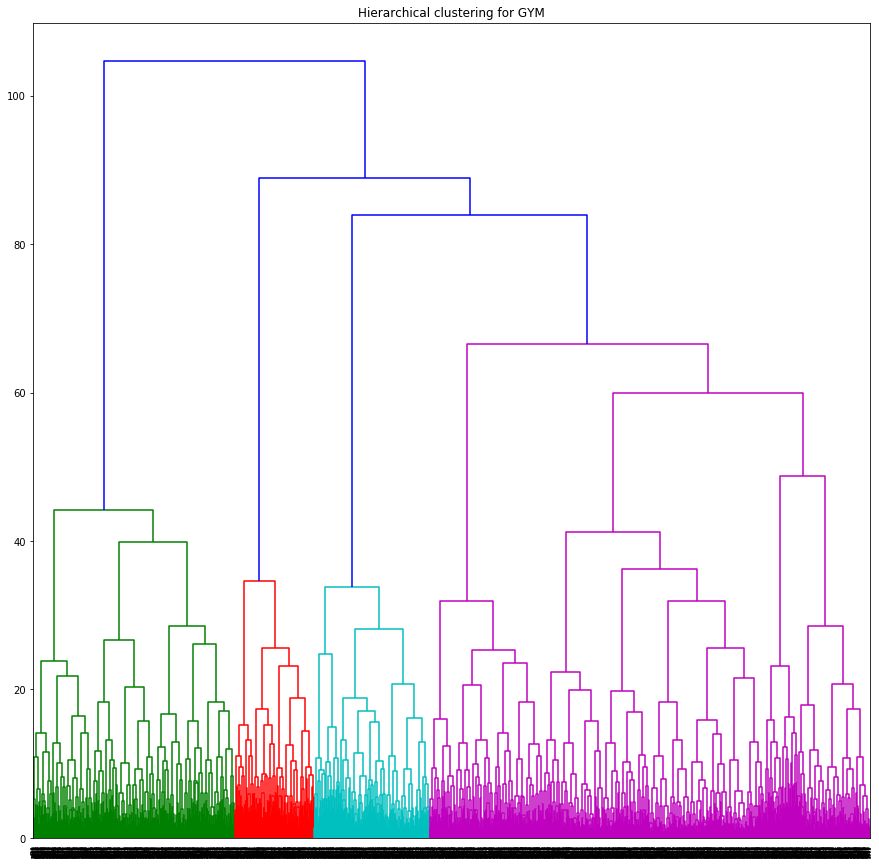

In [22]:
# plotting a dendrogram
plt.figure(figsize=(15, 15))
dendrogram(dist_matrix, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show();

From this dendrogram we see that there are 5 major clustes formed which in turn are classified in to many more cllusters.

In [23]:
# training the clustering model with the K-means algorithm and predicting customer clusters
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_st)

# adding new column to the dataframe
data['cluster_km'] =labels
cluster_mean = data.groupby(['cluster_km']).mean().reset_index()

In [24]:
cluster_mean

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


On an average cluster 0,3,4 are customers coming from nearby, cluster 0 are more likely partnered, cluster 2 did not have many promo_friends, cluster 0 seems to have almost a 10 monthscontract_period where as cluster 3 has only 1 month contact period! 

In [25]:
# checking the number of clusters and their count
data['cluster_km'].value_counts()

3    1262
0    1011
4     837
2     505
1     385
Name: cluster_km, dtype: int64

In [26]:
# creating a list of data frame excluding cluster_km
numerics = ['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','age',
            'contract_period',
            'avg_additional_charges_total',
            'month_to_end_contract',
            'lifetime',
            'avg_class_frequency_total',
            'avg_class_frequency_current_month',]

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:

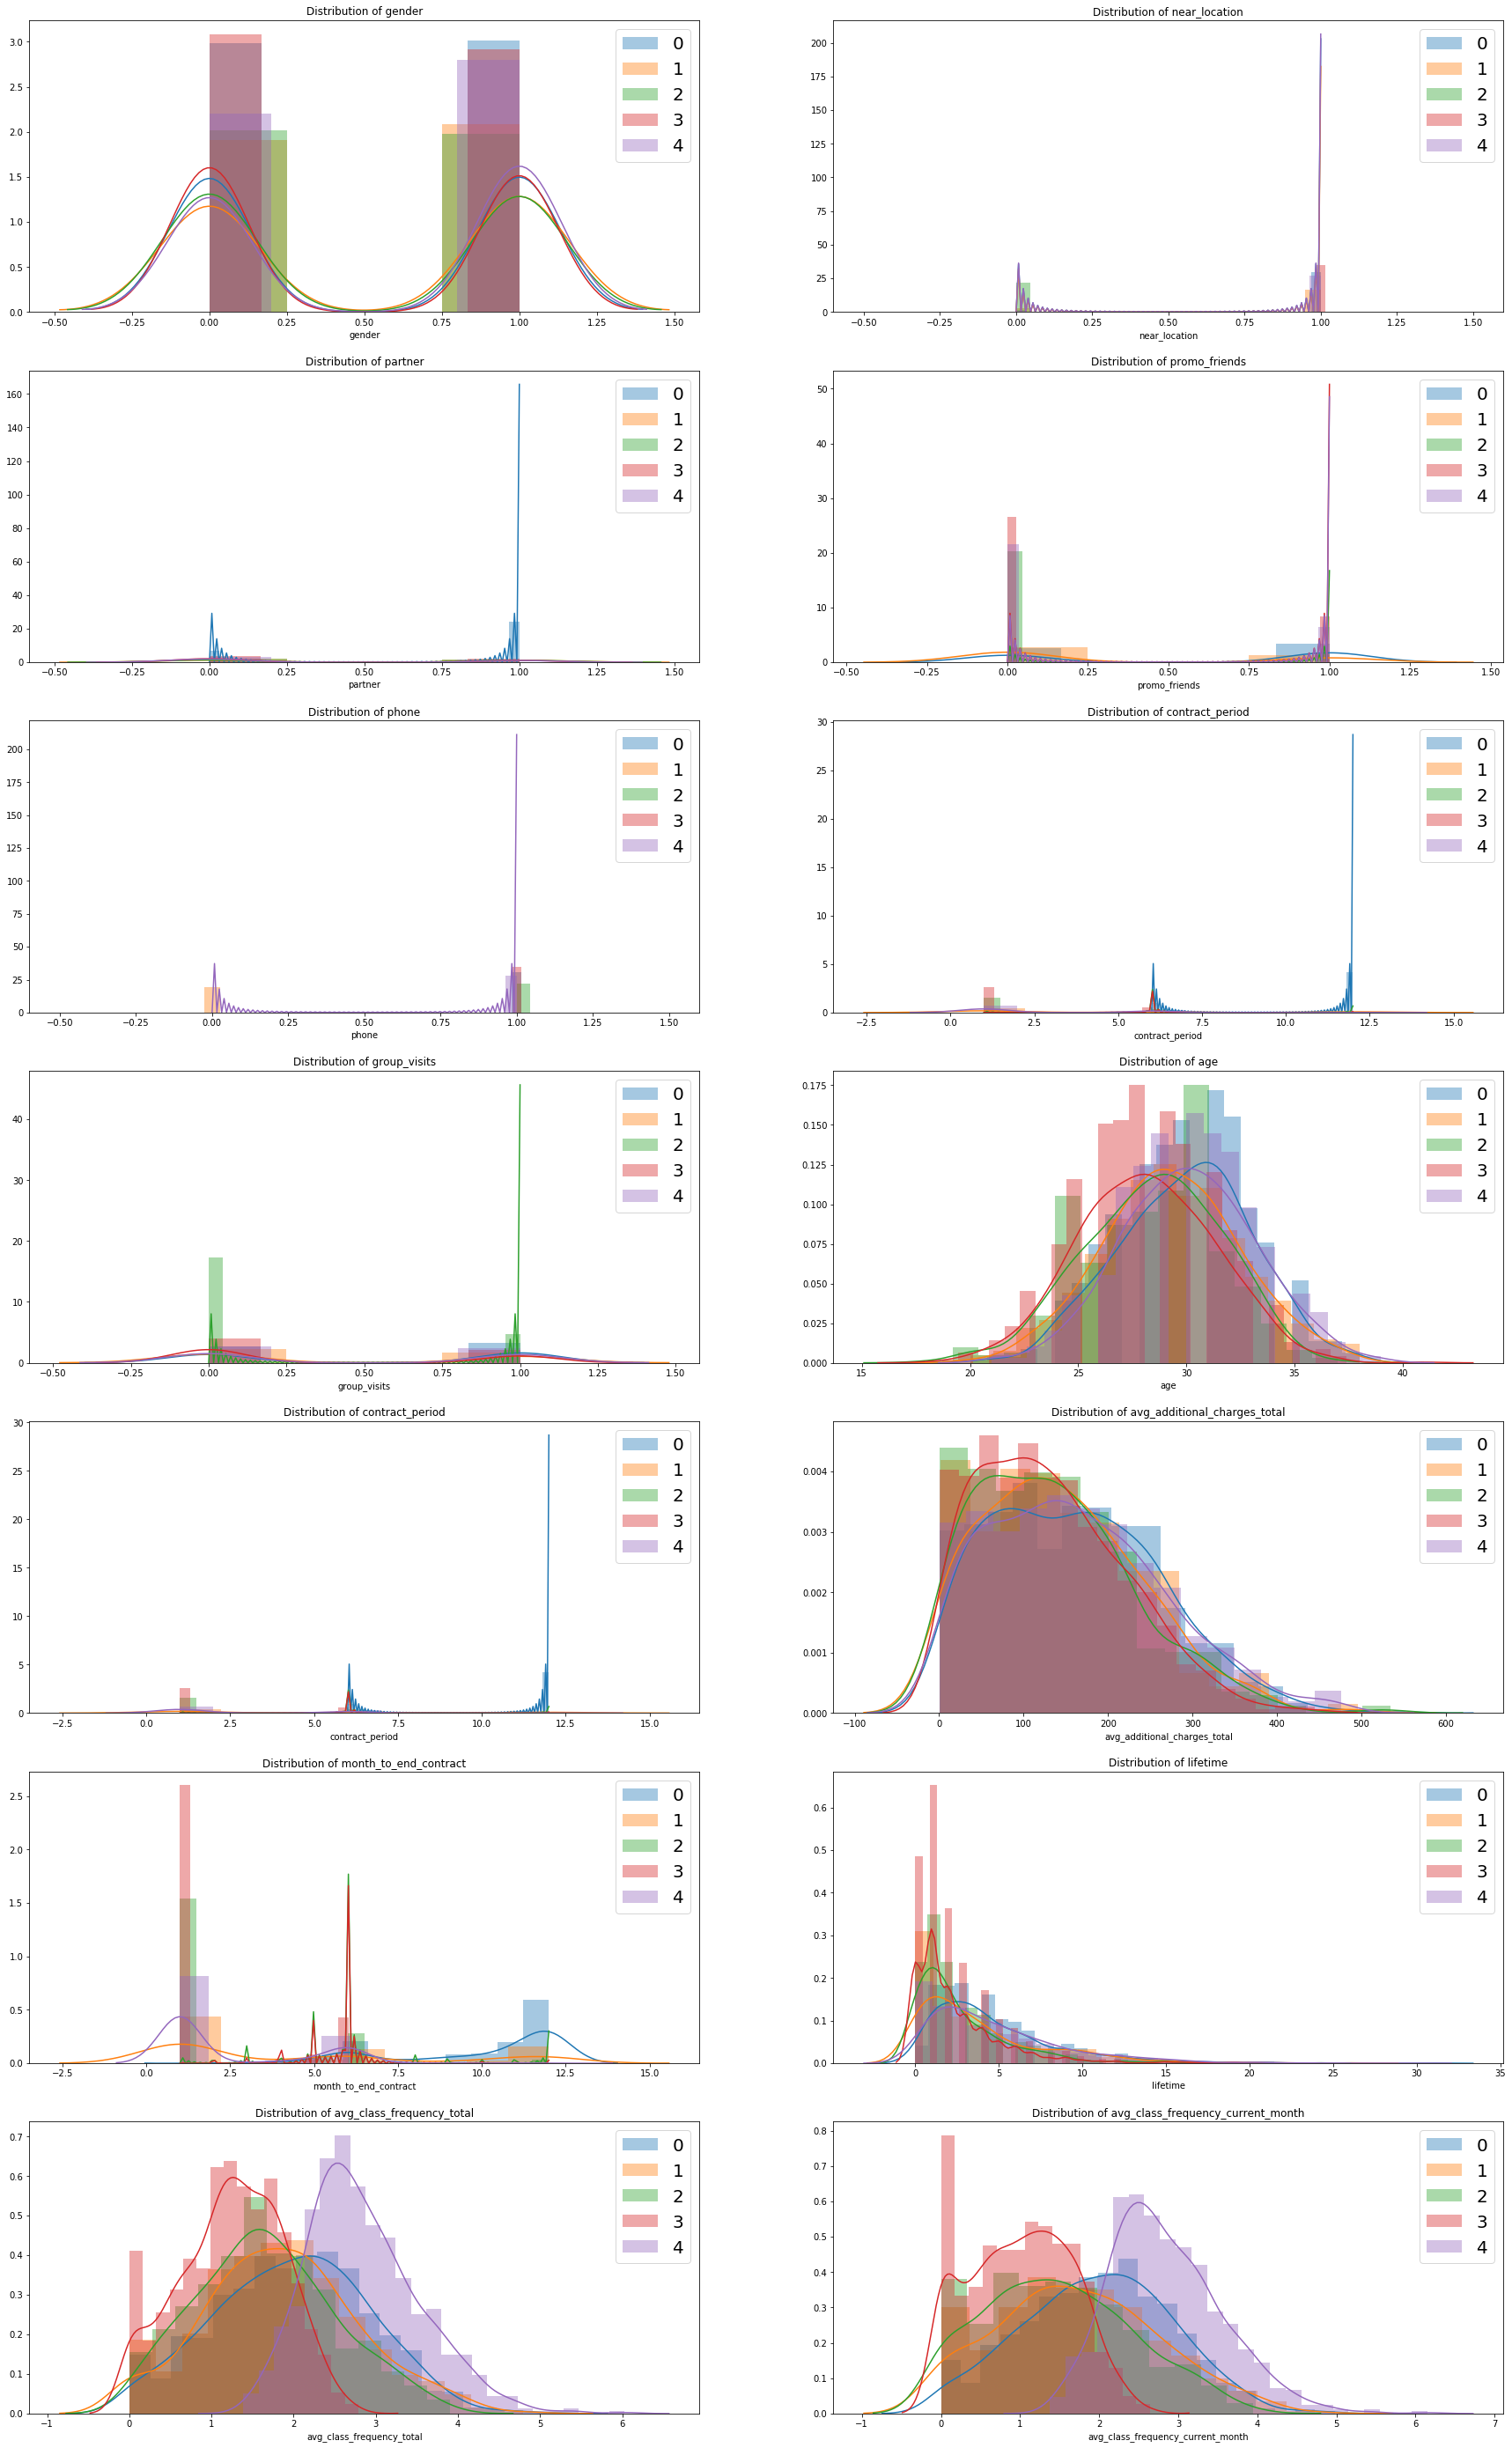

In [27]:
# plotting graphs to show distributions of features for the clusters
clusters = [0,1,2,3,4]
fig = plt.figure(figsize=(30,50))
subplot = 1
for i in numerics:
    plt.subplot(7,2,subplot)
    subplot +=1
    for j in clusters:
        data_cluster = data[data['cluster_km'] == j]
        sns.distplot(data_cluster[i])
        plt.legend(labels=clusters,fontsize=20)
        plt.title('Distribution of '+ i);
        
        

        
    

Looks like all the clusters have  maximum customers of around same age group of 25 to 35 and the age feature has normal distribution, the data on avg_additional_charges_total is skewed distribution and cluster 3 seems to be topping it, the lifetime featured is also highly skewed again here cluster 3 is in the lead, avg_class_freq_total and avg_class_freq_month seem to have almost similar distributions.

In [28]:
#  Calculating the churn rate for each cluster
churn_rate = data.groupby('cluster_km')['churn'].sum()/data.groupby('cluster_km')['churn'].count()
churn_rate

cluster_km
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: churn, dtype: float64

cluster 2 and cluster 3 seem to have higher churn rates of 0.443564, 0.51426 and cluster 0 and 4 has the least churn rates of 0.027695 , 0.068100 respectively.

## Coming up with conclusions and basic recommendations on working with customers

Overall, we can conclude that cluster 2 and cluster 3 are more likely to leave the gym where as cluster 0 and cluster 4 are the most loyal customers for the gym.

Most of the customers who are in cluster 0 and 4 are people having 25+ years, they mostly either choose 1 month contact or 12 month ones, their avg_additional_charges are pretty less when compared to others, their lifetime is mostly 5 months, they mostly stay nearby and are often partners and also have promo_friends.

Coming to my recommendations may be the fitness center needs to encourage their customers to take a higher duration contract period by reducing their price plans or by promoting it in more attractive ways by offering freebies like few free coupons of taxi rides for people not living nearby or something like that.

Encouraging people to share their contact details so that you can be in touch with them if they are gone for longer than expected time and focusing more on encouraging their existing customers to bring in more references in order to avail additional benefits of spa or steam room etc.
